# **K Means**

In [ ]:
import pandas as pd # For reading datasets
import numpy as np # For computations
import matplotlib.pyplot as plt # For visualization
from pandas import DataFrame # For creating data frame
from sklearn.cluster import KMeans

In [ ]:
Data={
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
    }
df = DataFrame(Data,columns=['x','y'])

In [ ]:
kmeans = KMeans(n_clusters=3).fit(df)

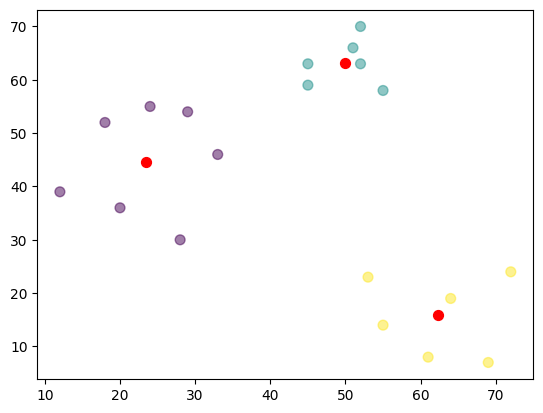

In [ ]:
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

In [ ]:
test_data = pd.DataFrame([
    [20, 20],
    [40, 60]
], columns=['x', 'y'])

label = kmeans.predict(test_data)
print(label)

[0 1]


# **Hierarchical Clustering**

In [ ]:
# TODO

# **Gaussian Mixture Model**

In [ ]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
d = pd.DataFrame(X)

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)

In [ ]:
labels = gmm.predict(d)
print('Converged:',gmm.converged_)
print(gmm.n_iter_)

In [ ]:
means = gmm.means_
means

In [ ]:
covariances = gmm.covariances_
covariances

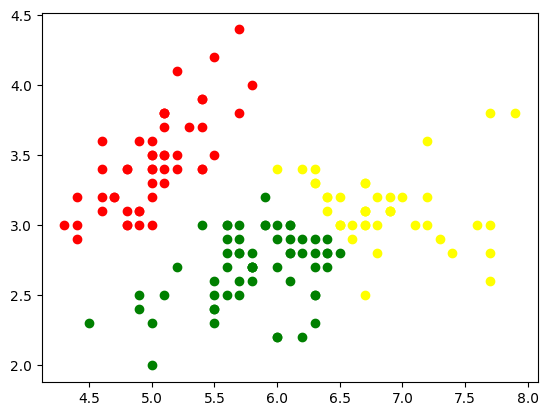

In [ ]:
d['labels'] = labels
d0 = d[d['labels'] == 0]
d1 = d[d['labels'] == 1]
d2 = d[d['labels'] == 2]

plt.scatter(d0[0], d0[1], c = 'r')
plt.scatter(d1[0], d1[1], c = 'yellow')
plt.scatter(d2[0], d2[1], c = 'g')

plt.show()

# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [ ]:
X = StandardScaler().fit_transform(X)
xx, yy = zip(*X)
plt.scatter(xx, yy)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples = db.core_sample_indices_

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
labels = db.labels_
outliers = X[labels == -1]

Text(0.5, 1.0, 'number of clusters: 3')

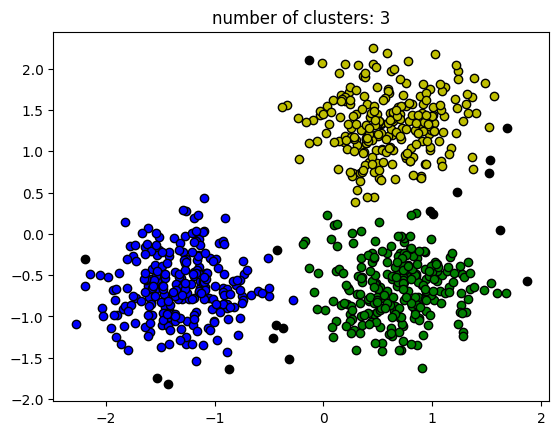

In [ ]:
cluster1 = X[labels == 0]
cluster2 = X[labels == 1]
cluster3 = X[labels == 2]

colors = ['y', 'b', 'g', 'r']
unique_labels = set(labels)

for k, col in zip(unique_labels, colors):
  if k == -1:
    col = 'k'

  class_member_mask = (labels == k)
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('number of clusters: %d' %n_clusters_)
